In [1]:
import numpy as np 
from matplotlib import pyplot as plt 
from scipy.special import factorial
import math
from tqdm import tqdm

In [2]:
def hermite(x, k):
    if k == 0:
        return 1
    elif k == 1:
        return 2 * x
    else:
        return 2 * x * hermite(x, k - 1) - 2 * (k - 1) * hermite(x, k - 2)

In [3]:
def calculate(beta, x):
    
    l = np.arange(len(x), 0, -1) * 1.0

    #f_x = np.zeros_like(x)
    Hk_x = np.zeros_like(x)

    # compute ck
    ck = np.zeros_like(l)
    for k in range(len(l)):
        ck[k] = (np.sqrt(np.pi) * (2 ** k) * factorial(k))**(-0.5)

    fx = 0
    for k in tqdm(range(len(x))):
        temp = l[k] * ck[k] * np.exp(-x*x/2) * hermite(x, k) + 0.001*x*x
    #     print(temp)
        fx = fx + temp
    V = fx

    # Square Matrix B
    B = []
    for ki in tqdm(range(len(x))):
        # Calculate b_k
        temp = ck[ki] * np.exp(-x * x/2) * hermite(x, ki)
        B.append(temp)

    B_inv = np.linalg.inv(B)
    C = np.dot(B, V)
    inter = np.dot(B_inv, C)

    # Non-Square Matrix B
    B_new = []
    for ki in tqdm(range(6)):
        # Calculate b_k
        temp = ck[ki] * np.exp(-x * x/2) * hermite(x, ki)
        B_new.append(temp)

    B_new = np.array(B_new)

    C_new = np.dot(V, np.dot(np.linalg.pinv(np.dot(B_new.T, B_new)), B_new.T))

    pseudo_inverse = np.dot(C_new, B_new)
    
    condition_num1 = np.linalg.cond(B)
    condition_num2 = np.linalg.cond(B_new)
    
    return fx, inter, pseudo_inverse, condition_num1, condition_num2

In [4]:
# # x1 = np.arange(0, 0.5, 0.03)
# x1 = np.linspace(0, 33, num=14)

# fx1, inter_0_2, pseudo_inverse_0_2, condition_num1, condition_num2 = calculate(0.000000000001, x1)
# print("square matrix condition number1:", condition_num1)
# print("non-square matrix condition number2:", condition_num2)
# print(condition_num2 - condition_num1)

# plt.plot(x1, fx1, label = "fx", linestyle='-.', marker = '*', markersize=17, linewidth=3)
# plt.plot(x1, inter_0_2, marker = 's', linewidth=2, markersize=6, label = "B is square_matrix",)
# plt.plot(x1, pseudo_inverse_0_2, label = "B is not square_matrix", linestyle=':', marker = "o", markersize = 6, linewidth=3)

# plt.xlabel("x")
# #plt.ylim(0, 3.5)
# plt.ylabel("value")
# #plt.ylim(0, 10)
# plt.legend()
# plt.grid()
# #plt.title("x from 0 to 0.5, beta = 0.0000000000001")
# plt.show

100%|██████████████████████████████████████████| 6/6 [00:00<00:00, 10086.50it/s]

square matrix condition number1: 1.5962756970940776e+19
non-square matrix condition number2: 44722697100606.19


<function matplotlib.pyplot.show(close=None, block=None)>

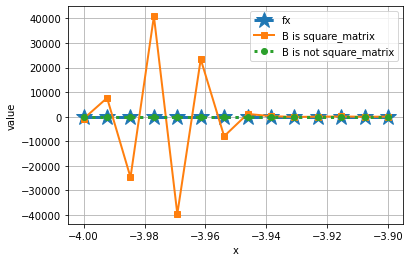

In [5]:
x2 = np.linspace(-4, -3.9, num=14)
fx2, inter_1_2, pseudo_inverse_1_2, condition_num1, condition_num2 = calculate(0.000000001, x2)
print("square matrix condition number1:", condition_num1)
print("non-square matrix condition number2:", condition_num2)

plt.plot(x2, fx2, label = "fx", linestyle='-.', marker = '*', markersize=17, linewidth=3)
plt.plot(x2, inter_1_2, marker = 's', linewidth=2, markersize=6, label = "B is square_matrix",)
plt.plot(x2, pseudo_inverse_1_2, label = "B is not square_matrix", linestyle=':', marker = "o", markersize = 6, linewidth=3)

plt.xlabel("x")
#plt.ylim(, 6)
plt.ylabel("value")
# plt.ylim(3, 6)
plt.legend()
plt.grid()
#plt.title("x from 0 to 0.5, beta = 0.001")
plt.show

In [6]:
# # square 6*6
# # x3 = np.linspace(-4, -1.05, num=8)
# x3 = np.linspace(-4, -3.9, num=8)
# fx3, inter_7_8, pseudo_inverse_7_8, condition_num1, condition_num2 = calculate(0.001, x3)
# print("square matrix condition number1:", condition_num1)
# print("non-square matrix condition number2:", condition_num2)

# plt.plot(x3, fx3, label = "fx", linestyle='-.', marker = '*', markersize=17, linewidth=3)
# plt.plot(x3, inter_7_8, marker = 's', linewidth=2, markersize=6, label = "B is square_matrix",)
# plt.plot(x3, pseudo_inverse_7_8, label = "B is not square_matrix", linestyle=':', marker = "o", markersize = 6, linewidth=3)

# plt.xlabel("x")
# #plt.ylim(0, 3.5)
# plt.ylabel("value")
# # plt.ylim(0, 1)
# plt.legend()
# plt.grid()
# #plt.title("x from 0 to 0.5, beta = 1e1")
# plt.show

In [7]:
# 6*6, 6*7, 6*8

In [8]:
#indepented value x
#depended value y